In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [92]:
contests_path = "../data/contests_data/fanduel_nba_contests.csv"  # Adjust path based on your working directory
contests_df = pd.read_csv(contests_path)

In [93]:
pred_path = "../output_csv/final_lineup.csv"
pred_df = pd.read_csv(pred_path)

In [94]:
pred_df.head()

,date,fanduel_player_pool_count,fanduel_GT_players,fanduel_predicted_players,fanduel_GT_points,fanduel_predicted_points,fanduel_predicted_lineup_GT_points,fanduel_GT_lineup_predicted_points,fanduel_GT_salary,fanduel_predicted_salary,fanduel_GT_duplicates,fanduel_predicted_duplicates,fanduel_overlap_players,fanduel_overlap_count,fanduel_overlap_GT_points,fanduel_overlap_predicted_points
0,2019-11-01,166,"['Malcolm Brogdon', 'Terrence Ross', 'Kemba Wa...","['Garrett Temple', 'Robin Lopez', 'Tristan Tho...",317.4,273.986700,289.0,258.808281,57100.0,59000.0,0,0,"['Russell Westbrook', 'Marquese Chriss']",2,78.2,66.800542
1,2019-11-02,164,"['Josh Richardson', 'Furkan Korkmaz', 'Jeff Te...","['Eric Paschall', 'Bruce Brown', 'Torrey Craig...",360.5,292.369013,337.4,308.208597,53500.0,52700.0,0,1,"['Bruce Brown', 'Giannis Antetokounmpo']",2,118.9,95.611177
2,2019-11-05,129,"['Daniel Theis', 'JaKarr Sampson', 'Trae Young...","['Zach LaVine', 'Rudy Gay', 'DeMar DeRozan', '...",336.6,253.446236,282.8,269.927535,57200.0,55100.0,0,0,"['DeMar DeRozan', 'Trae Young']",2,98.7,83.235892
3,2019-11-06,191,"['Buddy Hield', 'Montrezl Harrell', 'Nikola Vu...","['Markieff Morris', 'Pascal Siakam', 'Montrezl...",395.0,291.069014,366.2,274.757454,57800.0,53400.0,0,0,['Montrezl Harrell'],1,62.1,35.728135
4,2019-11-08,229,"['Taj Gibson', 'Evan Fournier', 'Kristaps Porz...","['Caris LeVert', 'Eric Bledsoe', 'Luke Kennard...",400.3,298.630707,304.0,257.374601,58100.0,51500.0,0,1,['Luke Kennard'],1,42.7,35.295896


In [95]:
pred_df.shape

(280, 16)

In [96]:
print(pred_df['date'].min())
print(pred_df['date'].max())

2019-11-01
2021-05-16


## Filter contests data

In [97]:
contests_df['period'] = pd.to_datetime(contests_df['period'])

print(contests_df['period'].max())

print(contests_df['period'].min())

2021-12-17 00:00:00
2017-10-17 00:00:00


In [98]:
contests_dff = contests_df[contests_df['period'].isin(pred_df['date'].unique())]

/var/folders/0x/w7cw7fzn00l3g7zbhq5476380000gn/T/ipykernel_13441/2031948090.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  contests_dff = contests_df[contests_df['period'].isin(pred_df['date'].unique())]


In [99]:
contests_dff.shape[0] / contests_df.shape[0]

0.4495672961102978

In [100]:
contests_dff['Title'].value_counts()

Title
Main                        21143
After Hours                  6539
Express                      2884
Late Night                   1409
Express II                   1031
                            ...  
4TH QTR ONLY (MEM @ GS)         2
4TH QTR ONLY (NY @ SAC)         2
NO @ PHO (2ND HALF ONLY)        1
4TH QTR ONLY (NO @ PHO)         1
4TH QTR ONLY (HOU @ OKC)        1
Name: count, Length: 787, dtype: int64

In [101]:
contests_dff = contests_dff[contests_dff['Title'].isin(['Main', 'After Hours', 'Express'])]

print(contests_dff.shape[0] / contests_df.shape[0])

0.28321257157682117


In [102]:
contests_dff['total_entrants'].value_counts()


total_entrants
100       5340
20        2261
3         1205
56         999
396        884
          ... 
17354        1
209308       1
111753       1
3903         1
885          1
Name: count, Length: 1741, dtype: int64

In [103]:
contests_dff = contests_dff[contests_dff['total_entrants'] > 50]

print(contests_dff.shape[0] / contests_df.shape[0])

0.2077441950966403


In [104]:
contests_dff['cost'].value_counts()

cost
2.00       4647
5.00       4309
1.00       2806
10.00      1876
3.00       1349
           ... 
3333.00       1
2020.00       1
5.25          1
0.02          1
20.20         1
Name: count, Length: 63, dtype: int64

In [105]:
contests_dff = contests_dff[contests_dff['cost'] >= 1]

print(contests_dff.shape[0] / contests_df.shape[0])

0.1948650000926561


In [106]:
contests_dff.head()

,id,site,league,slate,name,period,max_entries,max_entrants,cost,prizepool,places_paid,total_entrants,winning_score,mincash_score,winning_payout,mincash_payout,DateTime,Title,game_cnt,winner
30909,455276327,fanduel,NBA,39998,$500 NBA Small Layup,2019-11-01,3,119,5.0,500.0,30,98,357.7,324.2,50.0,10.0,11/1/19 19:30,Express,2.0,NaN
30911,455277264,fanduel,NBA,40000,$500 NBA Small Layup,2019-11-01,3,119,5.0,500.0,30,99,291.4,260.6,50.0,10.0,11/1/19 22:00,After Hours,2.0,NaN
30912,454930502,fanduel,NBA,39997,$500 NBA Small Layup,2019-11-01,3,119,5.0,500.0,30,119,358.3,310.4,50.0,10.0,11/1/19 19:00,Main,8.0,NaN
30913,454930703,fanduel,NBA,39997,$300 NBA Triple Up ($2),2019-11-01,1,170,2.0,300.0,50,170,347.2,310.1,6.0,6.0,11/1/19 19:00,Main,8.0,NaN
30914,454930668,fanduel,NBA,39997,NBA Beat The Score: 300 ($3K Guaranteed),2019-11-01,4,141,25.0,3000.0,0,141,348.6,300.0,NaN,NaN,11/1/19 19:00,Main,8.0,NaN


In [107]:
contests_dff = contests_dff[['period', 'Title', 'winning_score', 'mincash_score', 'total_entrants',  'cost', 'prizepool', 'mincash_payout']]

In [108]:
contests_dff.head()

,period,Title,winning_score,mincash_score,total_entrants,cost,prizepool,mincash_payout
30909,2019-11-01,Express,357.7,324.2,98,5.0,500.0,10.0
30911,2019-11-01,After Hours,291.4,260.6,99,5.0,500.0,10.0
30912,2019-11-01,Main,358.3,310.4,119,5.0,500.0,10.0
30913,2019-11-01,Main,347.2,310.1,170,2.0,300.0,6.0
30914,2019-11-01,Main,348.6,300.0,141,25.0,3000.0,NaN


In [109]:
pred_df.head()

,date,fanduel_player_pool_count,fanduel_GT_players,fanduel_predicted_players,fanduel_GT_points,fanduel_predicted_points,fanduel_predicted_lineup_GT_points,fanduel_GT_lineup_predicted_points,fanduel_GT_salary,fanduel_predicted_salary,fanduel_GT_duplicates,fanduel_predicted_duplicates,fanduel_overlap_players,fanduel_overlap_count,fanduel_overlap_GT_points,fanduel_overlap_predicted_points
0,2019-11-01,166,"['Malcolm Brogdon', 'Terrence Ross', 'Kemba Wa...","['Garrett Temple', 'Robin Lopez', 'Tristan Tho...",317.4,273.986700,289.0,258.808281,57100.0,59000.0,0,0,"['Russell Westbrook', 'Marquese Chriss']",2,78.2,66.800542
1,2019-11-02,164,"['Josh Richardson', 'Furkan Korkmaz', 'Jeff Te...","['Eric Paschall', 'Bruce Brown', 'Torrey Craig...",360.5,292.369013,337.4,308.208597,53500.0,52700.0,0,1,"['Bruce Brown', 'Giannis Antetokounmpo']",2,118.9,95.611177
2,2019-11-05,129,"['Daniel Theis', 'JaKarr Sampson', 'Trae Young...","['Zach LaVine', 'Rudy Gay', 'DeMar DeRozan', '...",336.6,253.446236,282.8,269.927535,57200.0,55100.0,0,0,"['DeMar DeRozan', 'Trae Young']",2,98.7,83.235892
3,2019-11-06,191,"['Buddy Hield', 'Montrezl Harrell', 'Nikola Vu...","['Markieff Morris', 'Pascal Siakam', 'Montrezl...",395.0,291.069014,366.2,274.757454,57800.0,53400.0,0,0,['Montrezl Harrell'],1,62.1,35.728135
4,2019-11-08,229,"['Taj Gibson', 'Evan Fournier', 'Kristaps Porz...","['Caris LeVert', 'Eric Bledsoe', 'Luke Kennard...",400.3,298.630707,304.0,257.374601,58100.0,51500.0,0,1,['Luke Kennard'],1,42.7,35.295896


## Merge the data

In [65]:
# Ensure correct column names
contests_dff.rename(columns={'period': 'game_date'}, inplace=True)
pred_df.rename(columns={'date': 'game_date'}, inplace=True)

In [66]:
# Convert game_date to datetime for proper merging
contests_dff['game_date'] = pd.to_datetime(contests_dff['game_date'])
pred_df['game_date'] = pd.to_datetime(pred_df['game_date'])


In [67]:
# Merge on game_date using a left join to keep all contests
merged_df = contests_dff.merge(pred_df, on='game_date', how='left')


In [68]:
merged_df.columns

Index(['game_date', 'Title', 'winning_score', 'mincash_score',
       'total_entrants', 'cost', 'prizepool', 'mincash_payout',
       'fanduel_player_pool_count', 'fanduel_GT_players',
       'fanduel_predicted_players', 'fanduel_GT_points',
       'fanduel_predicted_points', 'fanduel_predicted_lineup_GT_points',
       'fanduel_GT_lineup_predicted_points', 'fanduel_GT_salary',
       'fanduel_predicted_salary', 'fanduel_GT_duplicates',
       'fanduel_predicted_duplicates', 'fanduel_overlap_players',
       'fanduel_overlap_count', 'fanduel_overlap_GT_points',
       'fanduel_overlap_predicted_points'],
      dtype='object')

In [74]:
# Compare actual contest scores vs. predicted lineup performance
merged_df['winning_score_vs_pred'] = merged_df['winning_score'] - merged_df['fanduel_predicted_lineup_GT_points']
merged_df['winning_score_vs_gt'] = merged_df['winning_score'] - merged_df['fanduel_GT_points']
merged_df['cash_line_vs_pred'] = merged_df['mincash_score'] - merged_df['fanduel_predicted_lineup_GT_points']
merged_df['cash_line_vs_gt'] = merged_df['mincash_score'] - merged_df['fanduel_GT_points']

# Determine if the predicted lineup would have cashed
merged_df['pred_lineup_would_win'] = merged_df['fanduel_predicted_lineup_GT_points'] >= merged_df['winning_score']
merged_df['actual_lineup_would_win'] = merged_df['fanduel_GT_points'] >= merged_df['winning_score']

merged_df['pred_lineup_would_cash'] = merged_df['fanduel_predicted_lineup_GT_points'] >= merged_df['mincash_score']
merged_df['actual_lineup_would_cash'] = merged_df['fanduel_GT_points'] >= merged_df['mincash_score']

# Calculate percentile ranking
merged_df['predicted_percentile'] = 100 * (merged_df['fanduel_predicted_lineup_GT_points'] - merged_df['mincash_score']) / (merged_df['winning_score'] - merged_df['mincash_score'])
merged_df['actual_percentile'] = 100 * (merged_df['fanduel_GT_points'] - merged_df['mincash_score']) / (merged_df['mincash_score'] - merged_df['mincash_score'])

# Handle any NaNs after division
merged_df.fillna(0, inplace=True)

In [75]:
merged_df = merged_df[['game_date', 'winning_score', 'mincash_score', 'fanduel_predicted_lineup_GT_points', 'fanduel_GT_points', 'prizepool', 'mincash_payout', 'total_entrants', 'cost', 'actual_vs_pred', 'actual_vs_gt', 'cash_line_vs_pred', 'cash_line_vs_gt', 'pred_lineup_would_win', 'actual_lineup_would_win','pred_lineup_would_cash', 'actual_lineup_would_cash', 'predicted_percentile', 'actual_percentile', 'Title', 'fanduel_GT_players', 'fanduel_predicted_players']]

## Analyze data

In [77]:
len(merged_df[merged_df['pred_lineup_would_cash'] == True]) /  len(merged_df)

0.3463691265282074

In [78]:
len(merged_df[merged_df['pred_lineup_would_win'] == True]) /  len(merged_df)

0.06046545883046104

In [73]:
merged_df[merged_df['fanduel_predicted_lineup_GT_points'] > merged_df['winning_score']]

,game_date,winning_score,mincash_score,fanduel_predicted_lineup_GT_points,fanduel_GT_points,prizepool,mincash_payout,total_entrants,cost,actual_vs_pred,actual_vs_gt,cash_line_vs_pred,cash_line_vs_gt,pred_lineup_would_cash,actual_lineup_would_cash,predicted_percentile,actual_percentile,Title,fanduel_GT_players,fanduel_predicted_players
77,2019-11-02,328.1,289.9,337.4,360.5,1000.0,20.0,117,10.0,-9.3,-32.4,-47.5,-70.6,True,True,124.345550,inf,After Hours,"['Josh Richardson', 'Furkan Korkmaz', 'Jeff Te...","['Eric Paschall', 'Bruce Brown', 'Torrey Craig..."
95,2019-11-03,309.6,266.9,340.4,322.3,2500.0,30.0,196,15.0,-30.8,-12.7,-73.5,-55.4,True,True,172.131148,inf,Main,"['Wendell Carter Jr.', 'Delon Wright', 'Jimmy ...","['Jimmy Butler', 'Kevin Love', 'Dwight Howard'..."
96,2019-11-03,339.2,270.5,340.4,322.3,5000.0,50.0,235,25.0,-1.2,16.9,-69.9,-51.8,True,True,101.746725,inf,Main,"['Wendell Carter Jr.', 'Delon Wright', 'Jimmy ...","['Jimmy Butler', 'Kevin Love', 'Dwight Howard'..."
98,2019-11-03,315.1,269.4,340.4,322.3,500.0,10.0,119,5.0,-25.3,-7.2,-71.0,-52.9,True,True,155.361050,inf,Main,"['Wendell Carter Jr.', 'Delon Wright', 'Jimmy ...","['Jimmy Butler', 'Kevin Love', 'Dwight Howard'..."
99,2019-11-03,334.6,316.7,340.4,322.3,3000.0,50.0,141,25.0,-5.8,12.3,-23.7,-5.6,True,True,132.402235,inf,After Hours,"['Wendell Carter Jr.', 'Delon Wright', 'Jimmy ...","['Jimmy Butler', 'Kevin Love', 'Dwight Howard'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,2021-05-14,282.7,258.8,305.4,357.5,500.0,10.0,119,5.0,-22.7,-74.8,-46.6,-98.7,True,True,194.979079,inf,Express,"['Hamidou Diallo', 'Paul Reed', 'Russell Westb...","['R.J. Hampton', 'Kelly Olynyk', 'John Konchar..."
13494,2021-05-14,293.8,258.8,305.4,357.5,250.0,10.0,56,5.0,-11.6,-63.7,-46.6,-98.7,True,True,133.142857,inf,Express,"['Hamidou Diallo', 'Paul Reed', 'Russell Westb...","['R.J. Hampton', 'Kelly Olynyk', 'John Konchar..."
13553,2021-05-16,313.7,275.5,314.1,371.8,7000.0,65.0,249,33.0,-0.4,-58.1,-38.6,-96.3,True,True,101.047120,inf,After Hours,"['Nathan Knight', 'Bradley Beal', 'Tyrese Maxe...","['Saddiq Bey', 'KZ Okpala', 'Shake Milton', ""D..."
13561,2021-05-16,304.3,292.8,314.1,371.8,450.0,15.0,100,5.0,-9.8,-67.5,-21.3,-79.0,True,True,185.217391,inf,After Hours,"['Nathan Knight', 'Bradley Beal', 'Tyrese Maxe...","['Saddiq Bey', 'KZ Okpala', 'Shake Milton', ""D..."


## Basic Win & Cash Consistency

In [80]:
# Basic metrics
num_contests = len(merged_df)

win_pred_count = merged_df['pred_lineup_would_win'].sum()
win_actual_count = merged_df['actual_lineup_would_win'].sum()

cash_pred_count = merged_df['pred_lineup_would_cash'].sum()
cash_actual_count = merged_df['actual_lineup_would_cash'].sum()

print("Number of contests:", num_contests)
print("Win rate (predicted):", win_pred_count / num_contests)
print("Win rate (actual):", win_actual_count / num_contests)
print("Cash rate (predicted):", cash_pred_count / num_contests)
print("Cash rate (actual):", cash_actual_count / num_contests)


Number of contests: 13578
Win rate (predicted): 0.06046545883046104
Win rate (actual): 0.534909412284578
Cash rate (predicted): 0.3463691265282074
Cash rate (actual): 0.9537487111503903


## Profit Calculation & Overall Profitability

In [81]:
def compute_profit(row):
    """
    Very simplified approach:
    - If winning_score is beaten, get prizepool - cost.
    - Else if mincash_score is beaten, get mincash_payout - cost.
    - Otherwise, get -cost.
    """
    if row['pred_lineup_would_win']:
        return row['prizepool'] - row['cost']
    elif row['pred_lineup_would_cash']:
        return row['mincash_payout'] - row['cost']
    else:
        return -row['cost']

merged_df['pred_lineup_profit'] = merged_df.apply(compute_profit, axis=1)

In [82]:
total_profit = merged_df['pred_lineup_profit'].sum()
print(f"Total profit across all contests: ${total_profit:.2f}")

Total profit across all contests: $7895937.29


In [83]:
avg_profit = merged_df['pred_lineup_profit'].mean()
print(f"Average profit per contest: ${avg_profit:.2f}")


Average profit per contest: $581.52


In [84]:
# Summarize daily profits
daily_profit = (merged_df
                .groupby('game_date')['pred_lineup_profit']
                .sum()
                .reset_index()
                .rename(columns={'pred_lineup_profit':'daily_profit'}))

print(daily_profit.head())

   game_date  daily_profit
0 2019-11-01      -3099.43
1 2019-11-02      -3401.32
2 2019-11-03      88431.46
3 2019-11-04       6769.02
4 2019-11-05      -3453.21


## Visualizing Your Performance

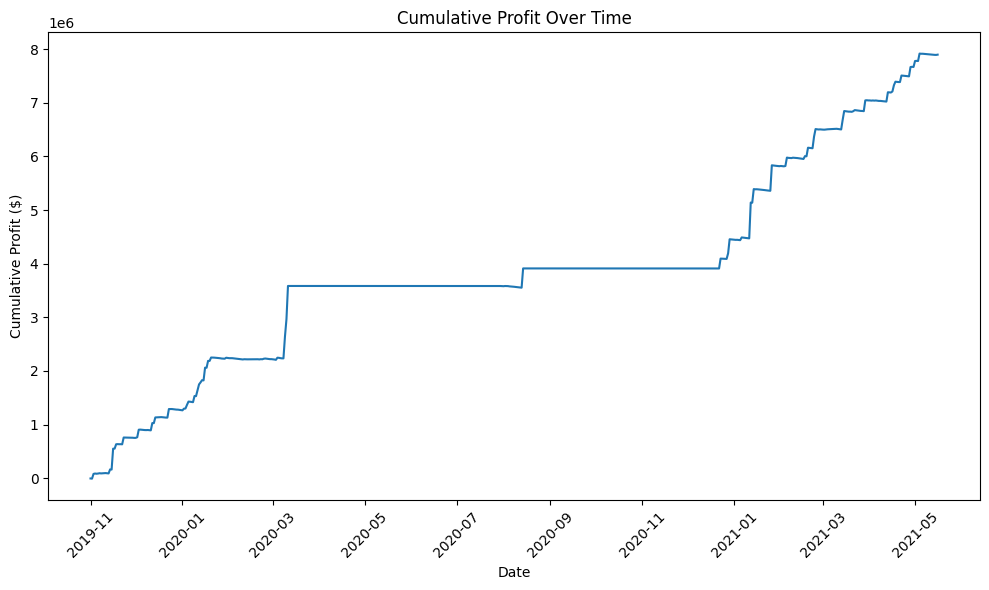

In [85]:
daily_profit['cumulative_profit'] = daily_profit['daily_profit'].cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_profit, x='game_date', y='cumulative_profit')
plt.title('Cumulative Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   year_month  contests_count  cash_count  win_count  avg_pred_score  \
0     2019-11            1162         660         86      310.984079   
1     2019-12            1205         487         48      304.992946   
2     2020-01            1269         496         91      313.777384   
3     2020-02            1490         467         16      307.372752   
4     2020-03             833         386        173      324.999640   
5     2020-07             182          45          0      307.386264   
6     2020-08             974         144         43      263.469815   
7     2020-12             330          97         19      269.183939   
8     2021-01             930         228         62      282.449032   
9     2021-02            1548         521         89      300.307300   
10    2021-03            1471         540         83      303.570836   
11    2021-04            1484         409         79      299.675270   
12    2021-05             700         223         32      308.55

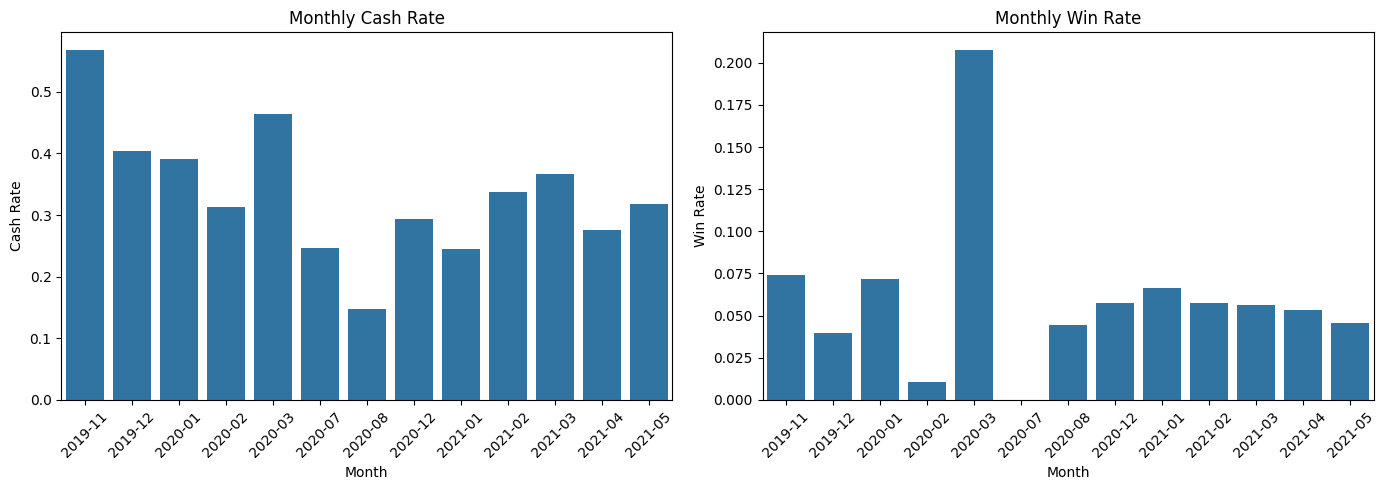

In [86]:
merged_df['year_month'] = merged_df['game_date'].dt.to_period('M')

monthly_stats = (merged_df
    .groupby('year_month')
    .agg(
        contests_count=('game_date', 'count'),
        cash_count=('pred_lineup_would_cash', 'sum'),
        win_count=('pred_lineup_would_win', 'sum'),
        avg_pred_score=('fanduel_predicted_lineup_GT_points', 'mean')
    )
    .reset_index())

monthly_stats['cash_rate'] = monthly_stats['cash_count'] / monthly_stats['contests_count']
monthly_stats['win_rate'] = monthly_stats['win_count'] / monthly_stats['contests_count']

print(monthly_stats)

# Plot monthly cash/win rates:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

sns.barplot(data=monthly_stats, x='year_month', y='cash_rate', ax=ax[0])
ax[0].set_title('Monthly Cash Rate')
ax[0].set_ylabel('Cash Rate')
ax[0].set_xlabel('Month')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=monthly_stats, x='year_month', y='win_rate', ax=ax[1])
ax[1].set_title('Monthly Win Rate')
ax[1].set_ylabel('Win Rate')
ax[1].set_xlabel('Month')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Distribution Plots of Score Differences

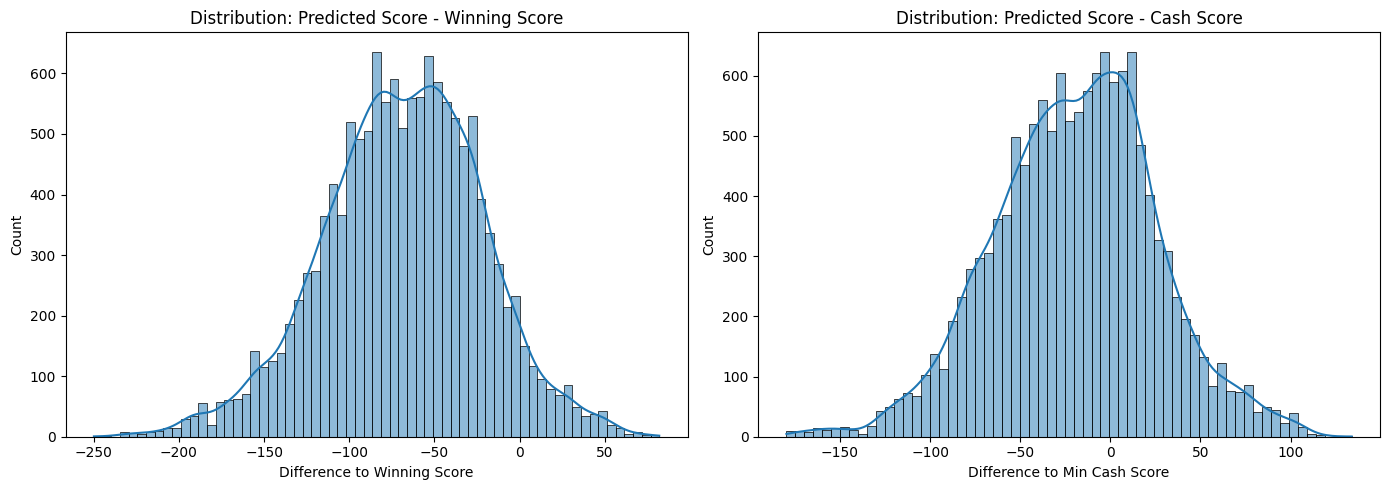

In [87]:
merged_df['score_diff_to_win'] = merged_df['fanduel_predicted_lineup_GT_points'] - merged_df['winning_score']
merged_df['score_diff_to_cash'] = merged_df['fanduel_predicted_lineup_GT_points'] - merged_df['mincash_score']

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(merged_df['score_diff_to_win'], kde=True, ax=ax[0])
ax[0].set_title('Distribution: Predicted Score - Winning Score')
ax[0].set_xlabel('Difference to Winning Score')

sns.histplot(merged_df['score_diff_to_cash'], kde=True, ax=ax[1])
ax[1].set_title('Distribution: Predicted Score - Cash Score')
ax[1].set_xlabel('Difference to Min Cash Score')

plt.tight_layout()
plt.show()


In [90]:
merged_df.to_csv('../output_csv/merged_contests_pred_data.csv', index=False)